In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [273]:
def plot(img):
    plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
    plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

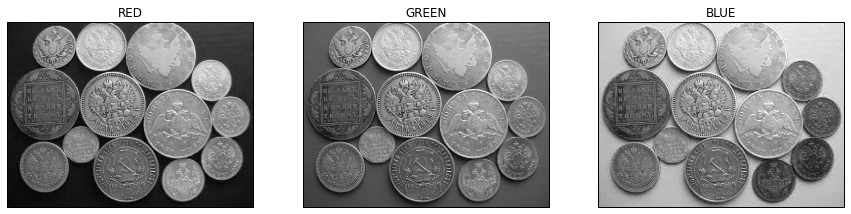

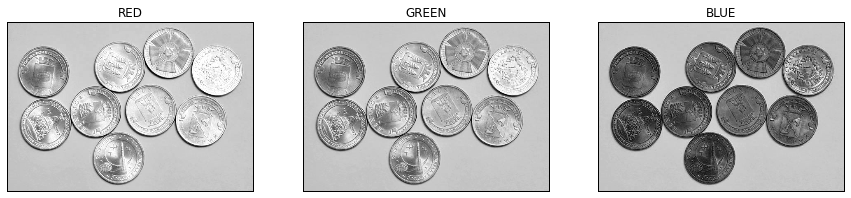

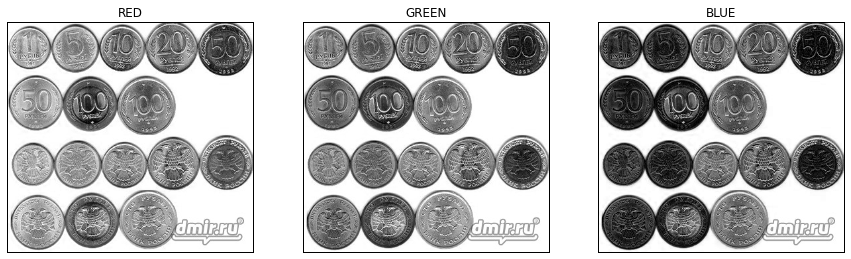

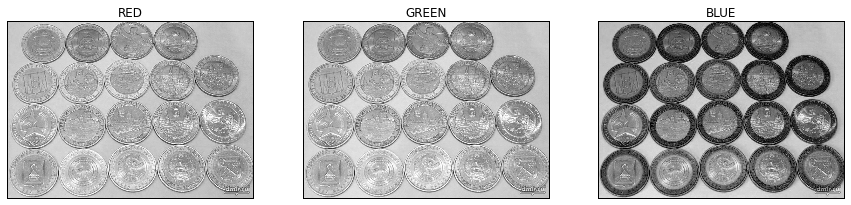

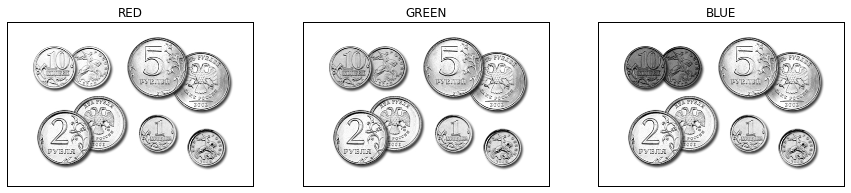

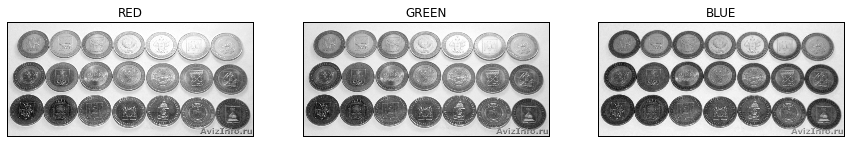

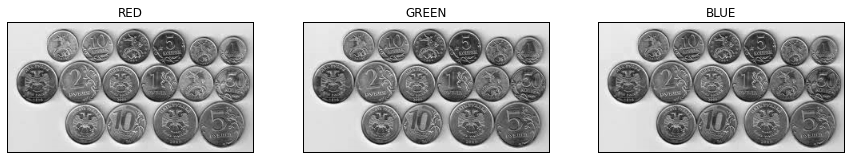

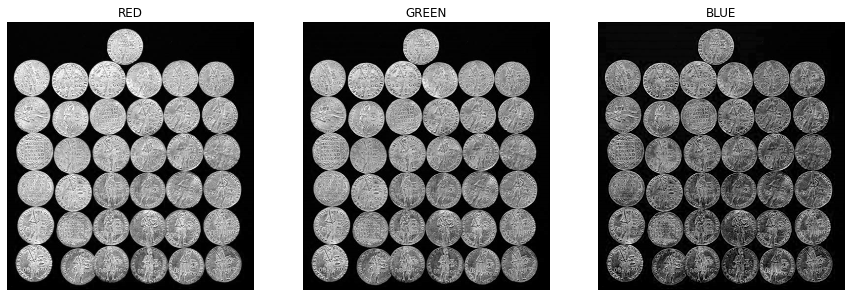

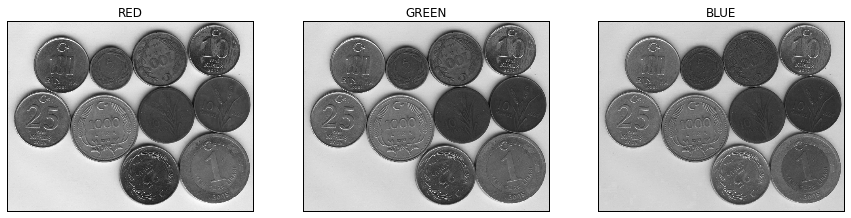

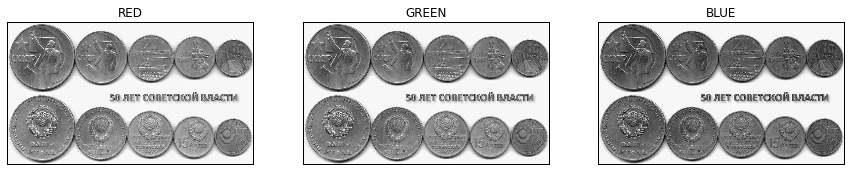

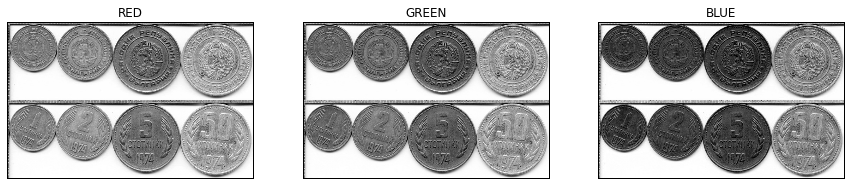

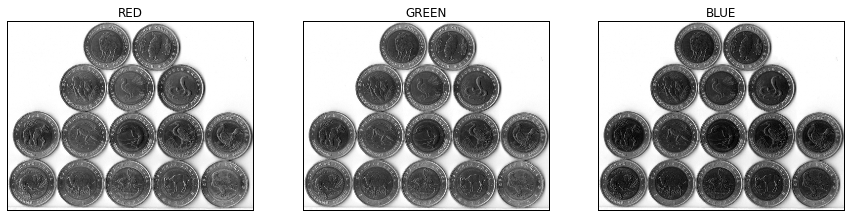

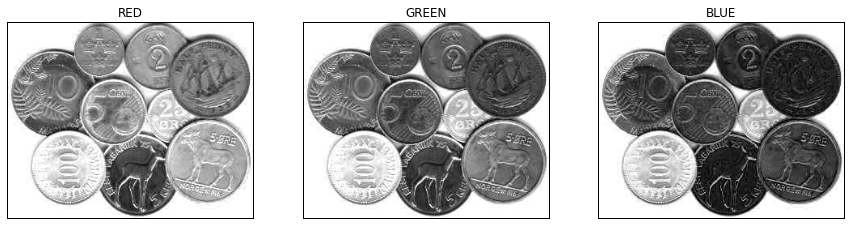

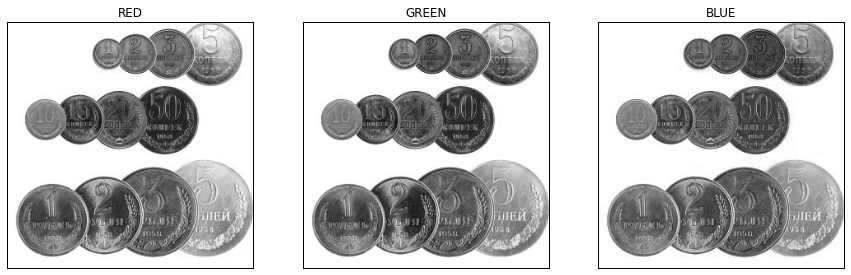

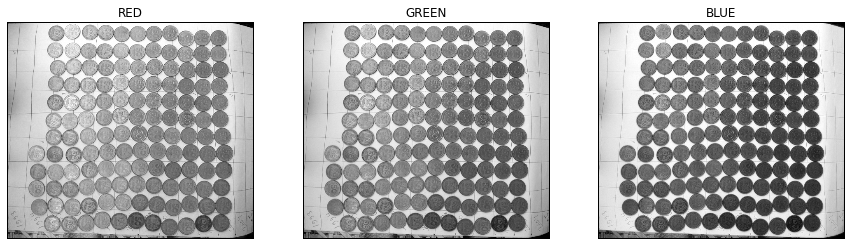

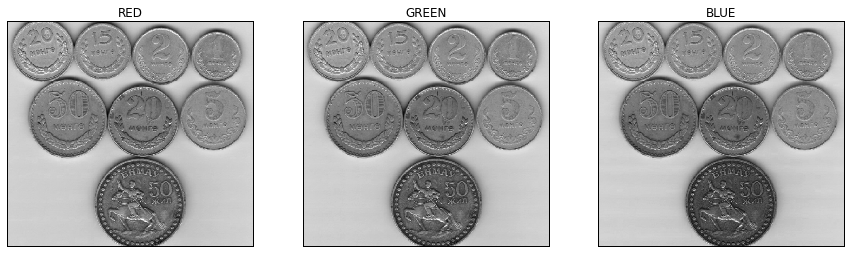

In [397]:
for i in range(16):
    img = cv2.imread('Money_' + str(i + 1) + '.bmp')
    b, g, r = cv2.split(img)
    plt.rcParams['figure.figsize'] = 15, 20
    plt.subplot(131)
    plt.title('RED')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.imshow(r, cmap='gray')
    plt.subplot(132)
    plt.title('GREEN')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.imshow(g, cmap='gray')
    plt.subplot(133)
    plt.title('BLUE')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.imshow(b, cmap='gray')
    plt.show()

In [2050]:
def count(name, C=-10, opR=13, clR=25, dil=(7, 10), er=(5, 1), re=(7, 1)):
    img = cv2.imread(name)
    b, g, r = cv2.split(img)
    
    flag = np.all(img[13][15] > [100, 100, 100])
    binImg = cv2.adaptiveThreshold(cv2.GaussianBlur((b if flag else r), (5, 5), 0), #cv2.equalizeHist
                                   255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY if flag else cv2.THRESH_BINARY_INV,
                                   199, C if flag else 1)
    plot(binImg)
    plt.show()
    
    openImg = cv2.morphologyEx(binImg, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (opR, opR)))
    plt.title('open')
    plot(openImg)
    plt.show()
    
    closeImg = cv2.morphologyEx(openImg, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (clR, clR)))
    plt.title('close')
    plot(closeImg)
    plt.show()
    
    dilate = cv2.dilate(closeImg, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dil[0], dil[0])), iterations=dil[1])
    plt.title('dilate')
    plot(dilate)
    plt.show()
    
    erode = cv2.erode(dilate, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (er[0], er[0])), iterations=er[1])
    plt.title('erode')
    plot(erode)
    plt.show()
    
    res = cv2.dilate(erode, cv2.getStructuringElement(cv2.MORPH_RECT, (re[0], re[0])), iterations=re[1])
    plt.title('res')
    plot(res)
    plt.show()
    
    cont = cv2.findContours(res, cv2.cv.CV_RETR_TREE, cv2.cv.CV_CHAIN_APPROX_NONE)[0]
    return len(cont) - 1
    
#     for i in range(len(cont)):
#     cv2.drawContours(res, cont, i, [255, 255, 255])
#     plot(res)

False


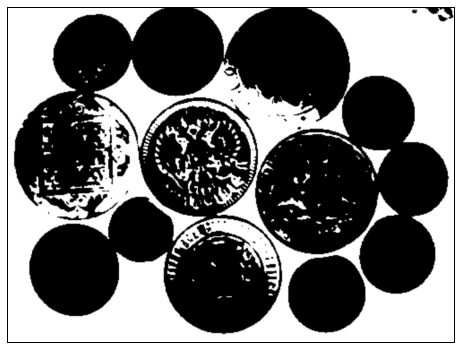

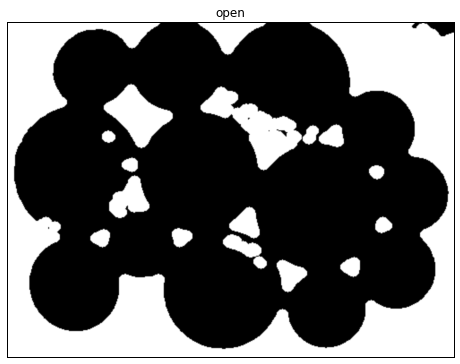

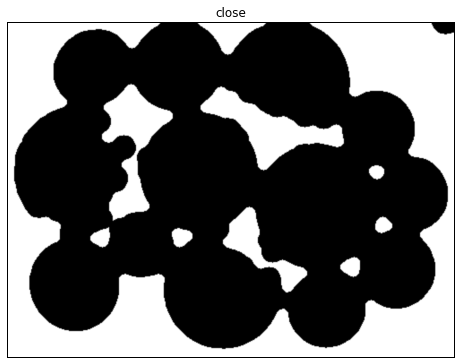

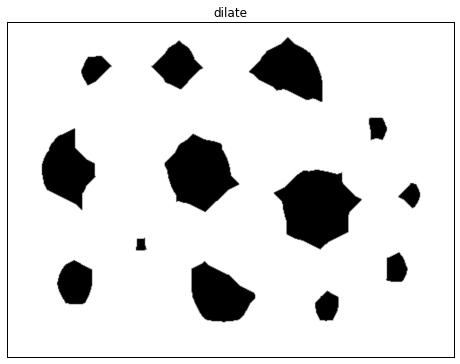

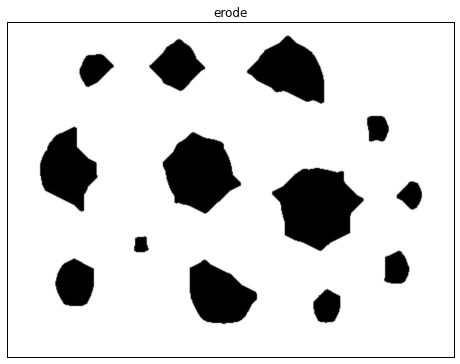

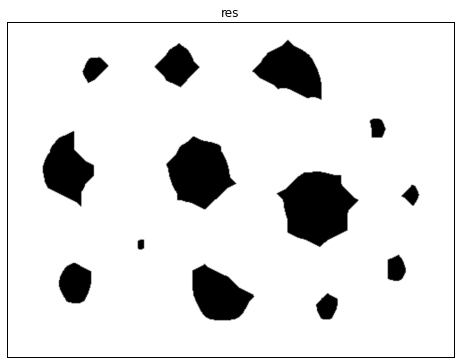

13

In [2051]:
count('Money_1.bmp')